In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.inputs.tf_keras import PlotLossesCallback

from sklearn.linear_model import LogisticRegression

import random

In [2]:
 df = pd.read_csv('calculation.csv')

In [3]:
df

,Text,Result,isOdd
0,88 + 54,142,0
1,18 + 22,40,0
2,21 + 37,58,0
3,0 + 32,32,0
4,49 + 45,94,0
...,...,...,...
99995,57 % 90,57,1
99996,47 % 64,47,1
99997,5 % 23,5,1
99998,45 % 50,45,1


In [4]:
texts = df['Text'].values
y = df['isOdd'].values

In [5]:
texts

array(['88 + 54', '18 + 22', '21 + 37', ..., '5 % 23', '45 % 50',
       '52 % 15'], dtype=object)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
y2 = []
for e in df.isOdd:
    if e==1:
        y2.append(np.array([1,0]))
    if e==0:
        y2.append(np.array([0,1]))
   

In [8]:
y = np.array(y2)

In [9]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [10]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, y, test_size=0.25, random_state=20210724)

In [11]:
texts_train

array(['99 + 92', '45 - 18', '10 // 46', ..., '82 % 23', '50 % 20',
       '21 - 57'], dtype=object)

In [12]:
texts_test

array(['55 % 33', '19 % 99', '81 - 69', ..., '12 * 60', '71 + 3',
       '90 * 67'], dtype=object)

In [13]:
y_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [14]:
y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [15]:
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w\w|\W+\b")
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b|\b\W+\b")
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b|\b\W+\b")
vectorizer.fit(texts_train)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w+\\b|\\b\\W+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
vectorizer.vocabulary_

{'99': 105,
 ' + ': 2,
 '92': 98,
 '45': 46,
 ' - ': 3,
 '18': 16,
 '10': 7,
 ' // ': 4,
 '46': 47,
 '72': 76,
 '89': 94,
 '90': 96,
 ' % ': 0,
 '5': 51,
 '27': 26,
 '64': 67,
 '70': 74,
 '66': 69,
 '65': 68,
 '28': 27,
 '63': 66,
 '42': 43,
 '22': 21,
 '61': 64,
 '25': 24,
 '85': 90,
 '32': 32,
 '81': 86,
 '29': 28,
 '23': 22,
 '56': 58,
 '86': 91,
 '26': 25,
 '60': 63,
 ' * ': 1,
 '34': 34,
 '16': 14,
 '62': 65,
 '39': 39,
 '67': 70,
 '88': 93,
 '7': 73,
 '21': 20,
 '24': 23,
 '58': 60,
 '19': 17,
 '12': 10,
 '75': 79,
 '11': 9,
 '55': 57,
 '38': 38,
 '87': 92,
 '100': 8,
 '73': 77,
 '82': 87,
 '91': 97,
 '80': 85,
 '31': 31,
 '8': 84,
 '53': 55,
 '79': 83,
 '69': 72,
 '59': 61,
 '4': 40,
 '1': 6,
 '83': 88,
 '33': 33,
 '2': 18,
 '30': 30,
 '74': 78,
 '44': 45,
 '36': 36,
 '50': 52,
 '41': 42,
 '78': 82,
 '47': 48,
 '51': 53,
 '6': 62,
 '93': 99,
 '57': 59,
 '40': 41,
 '52': 54,
 '54': 56,
 '15': 13,
 '68': 71,
 '13': 11,
 '71': 75,
 '49': 50,
 '94': 100,
 '0': 5,
 '84': 89,
 '97': 1

In [17]:
X_train = vectorizer.transform(texts_train)
X_test  = vectorizer.transform(texts_test)
X_train

<75000x106 sparse matrix of type '<class 'numpy.int64'>'
	with 224148 stored elements in Compressed Sparse Row format>

In [18]:
X_test

<25000x106 sparse matrix of type '<class 'numpy.int64'>'
	with 74733 stored elements in Compressed Sparse Row format>

In [19]:
input_dim = X_train.shape[1]
input_dim

106

In [20]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
#model.add(layers.Dense(1, activation='sigmoid'))
model


In [21]:
model.compile(loss='categorical_crossentropy',  optimizer='adam',   metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1070      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


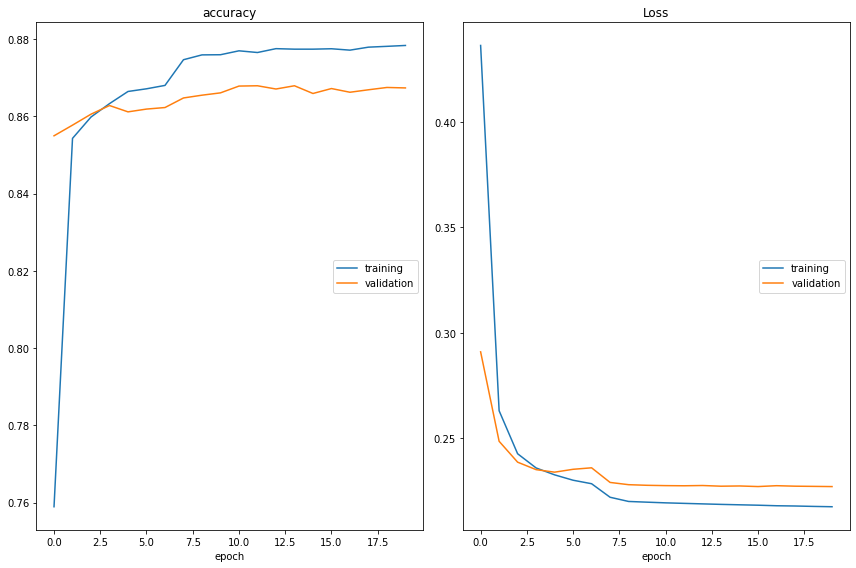

accuracy
	training         	 (min:    0.759, max:    0.878, cur:    0.878)
	validation       	 (min:    0.855, max:    0.868, cur:    0.867)
Loss
	training         	 (min:    0.217, max:    0.436, cur:    0.217)
	validation       	 (min:    0.227, max:    0.291, cur:    0.227)

Epoch 00020: saving model to model_weights.h5


In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001, mode='auto')

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(X_train, y_train,
                     epochs=20,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10,
                       callbacks=callbacks)

In [28]:
texts = np.array(['1 + 1'])
X = vectorizer.transform(texts)
model.predict(X)

array([[0.12112442, 0.8733083 ]], dtype=float32)

In [30]:
texts = np.array(['2 + 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[6.9633505e-05, 9.9931639e-01]], dtype=float32)

In [31]:
texts = np.array(['13 * 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[1.8328165e-06, 9.9941778e-01]], dtype=float32)

In [34]:
texts = np.array(['13 - 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[0.89393413, 0.04362881]], dtype=float32)

In [35]:
texts = np.array(['13 // 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[0.2656101 , 0.49233252]], dtype=float32)

In [36]:
texts = np.array(['130 // 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[0.41403446, 0.24035746]], dtype=float32)

In [39]:
texts = np.array(['89 // 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[0.32296443, 0.38551342]], dtype=float32)

In [40]:
texts = np.array(['88 % 10'])
X = vectorizer.transform(texts)
model.predict(X)

array([[7.0284635e-08, 9.9999964e-01]], dtype=float32)

In [43]:
texts = np.array(['55 % 7'])
X = vectorizer.transform(texts)
model.predict(X)
#odd, even

array([[0.42031267, 0.29160368]], dtype=float32)

In [47]:
def predict_result(text):
    results = ["Odd","Even"]
    texts = np.array([text])
    X = vectorizer.transform(texts)
    result = model.predict(X)
    return results[np.argmax(result)]

In [49]:
predict_result("1 + 1")

'Even'

In [50]:
predict_result("1 - 1")

'Even'

In [51]:
predict_result("1 * 1")

'Odd'

In [52]:
predict_result("1 // 1")

'Odd'

In [53]:
predict_result("1 % 1")

'Even'

In [186]:
operations = ['+','-','*','//','%']
x = random.randint(0,100)
y = random.randint(1,100)
operator = operations[random.randint(0,4)]
text = str(x)+" "+operator+" "+str(y)
print("####ML BRAIN####")
print()
print(text," is ",end="")
print(predict_result(text))

if operator == '+':
    z = x+y
elif operator == '-':
    z = x-y
elif operator == '*':
    z = x*y
elif operator == '//':
    z = x//y
elif operator == '%':
    z = x%y

print()
print("Actually it is",['Even','Odd'][z%2])


####ML BRAIN####

15 // 83  is Even

Actually it is Even


In [187]:
def guessRight():
    operations = ['+','-','*','//','%']
    x = random.randint(0,100)
    y = random.randint(1,100)
    operator = operations[random.randint(0,4)]
    text = str(x)+" "+operator+" "+str(y)

    if operator == '+':
        z = x+y
    elif operator == '-':
        z = x-y
    elif operator == '*':
        z = x*y
    elif operator == '//':
        z = x//y
    elif operator == '%':
        z = x%y

    return ['Even','Odd'][z%2] == predict_result(text)
    

In [195]:
count = 0
num = 1000
for i in range(num):
    if guessRight():
        count += 1
count/num

0.872

In [198]:
predict_result("1 // 0")

'Even'

In [200]:
for i in range(101):
    text = str(i)+ " // 0"
    print(text,predict_result(text))

0 // 0 Even
1 // 0 Even
2 // 0 Even
3 // 0 Even
4 // 0 Even
5 // 0 Even
6 // 0 Even
7 // 0 Even
8 // 0 Even
9 // 0 Even
10 // 0 Even
11 // 0 Even
12 // 0 Even
13 // 0 Even
14 // 0 Even
15 // 0 Even
16 // 0 Even
17 // 0 Even
18 // 0 Even
19 // 0 Even
20 // 0 Even
21 // 0 Even
22 // 0 Even
23 // 0 Even
24 // 0 Even
25 // 0 Even
26 // 0 Even
27 // 0 Even
28 // 0 Even
29 // 0 Even
30 // 0 Even
31 // 0 Even
32 // 0 Even
33 // 0 Even
34 // 0 Even
35 // 0 Even
36 // 0 Even
37 // 0 Even
38 // 0 Even
39 // 0 Even
40 // 0 Even
41 // 0 Even
42 // 0 Even
43 // 0 Even
44 // 0 Even
45 // 0 Even
46 // 0 Even
47 // 0 Even
48 // 0 Even
49 // 0 Even
50 // 0 Even
51 // 0 Even
52 // 0 Even
53 // 0 Even
54 // 0 Even
55 // 0 Even
56 // 0 Even
57 // 0 Even
58 // 0 Even
59 // 0 Even
60 // 0 Even
61 // 0 Even
62 // 0 Even
63 // 0 Even
64 // 0 Even
65 // 0 Even
66 // 0 Even
67 // 0 Even
68 // 0 Even
69 // 0 Even
70 // 0 Even
71 // 0 Even
72 // 0 Even
73 // 0 Even
74 // 0 Even
75 // 0 Even
76 // 0 Even
77 // 0 E

In [201]:
for i in range(101):
    text = str(i)+ " % 0"
    print(text,predict_result(text))

0 % 0 Even
1 % 0 Even
2 % 0 Even
3 % 0 Even
4 % 0 Even
5 % 0 Even
6 % 0 Even
7 % 0 Even
8 % 0 Even
9 % 0 Even
10 % 0 Even
11 % 0 Even
12 % 0 Even
13 % 0 Even
14 % 0 Even
15 % 0 Even
16 % 0 Even
17 % 0 Even
18 % 0 Even
19 % 0 Even
20 % 0 Even
21 % 0 Even
22 % 0 Even
23 % 0 Even
24 % 0 Even
25 % 0 Even
26 % 0 Even
27 % 0 Even
28 % 0 Even
29 % 0 Even
30 % 0 Even
31 % 0 Even
32 % 0 Even
33 % 0 Even
34 % 0 Even
35 % 0 Even
36 % 0 Even
37 % 0 Even
38 % 0 Even
39 % 0 Even
40 % 0 Even
41 % 0 Even
42 % 0 Even
43 % 0 Even
44 % 0 Even
45 % 0 Even
46 % 0 Even
47 % 0 Even
48 % 0 Even
49 % 0 Even
50 % 0 Even
51 % 0 Even
52 % 0 Even
53 % 0 Even
54 % 0 Even
55 % 0 Even
56 % 0 Even
57 % 0 Even
58 % 0 Even
59 % 0 Even
60 % 0 Even
61 % 0 Even
62 % 0 Even
63 % 0 Even
64 % 0 Even
65 % 0 Even
66 % 0 Even
67 % 0 Even
68 % 0 Even
69 % 0 Even
70 % 0 Even
71 % 0 Even
72 % 0 Even
73 % 0 Even
74 % 0 Even
75 % 0 Even
76 % 0 Even
77 % 0 Even
78 % 0 Even
79 % 0 Even
80 % 0 Even
81 % 0 Even
82 % 0 Even
83 % 0 Even
84

In [42]:
55%7

6

In [27]:
raise

RuntimeError: No active exception to reraise

In [ ]:
texts = df['Text'].values
y = df['isOdd'].values

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, y, test_size=0.25, random_state=20210724)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(texts_train)
vectorizer

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
score = classifier.score(X_test, y_test)
score

In [ ]:
texts = np.array(['13 - 10'])
X = vectorizer.transform(texts)
X

In [ ]:
vectorizer.vocabulary_

In [ ]:
vectorizer.transform(texts).toarray()